# <font style="color:rgb(50,120,229)">Blurring</font>

## <font style="color:rgb(50,120,229)"> Overview</font>

In this module, we will cover the following topics.

1. **Box Blur**
1. **Gaussian Blur**
2. **Median Blur**
3. **Bilateral Filtering**
4. **Bilateral vs Median: Comparison under different noise conditions**

# <font style="color:rgb(50,120,229)">Box Blur</font>
A very common use case for convolution is blurring or smoothing or Low pass filtering. It reduces the noise in the image. The noise in an image can be due to **external factors** like poor lighting or environment or **internal factors** like a few pixels in the sensor may have gone bad. We can use image blurring/smoothing techniques to get rid of different types of noise.

In the previous example, we saw how to create a smoothing filter by convolving the image with a 5x5 kernel. The 3x3 version of that kernel looks like this

$$
\frac{1}{9} 
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
$$

As shown in the previous example, we can create this kernel and apply it to this image using **filter2D**. However, because blurring is such a common operation, OpenCV provides a direct function called [**`blur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) for blurring an image. Internally, blur uses [**`filter2D`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). 

## <font style="color:rgb(50,120,229)">Box Blur in OpenCV</font>

The simplest usage of the blur function is given below

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.blur(	src, ksize[, dst[, anchor[, borderType]]]	)
```
**Parameters**
- **`src`**	input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`ksize`**	blurring kernel size.
- **`anchor`**	anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
- **`borderType`**	border mode used to extrapolate pixels outside of the image.

In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

filename = DATA_PATH+"images/gaussian-noise.png"

# Load an image
img = cv2.imread(filename)

Apply box filtering with two kernels of sizes 3 and 7 with the 'blur' function. The first parameter passed is the input image and second parameter is the kernel size.

In [2]:
# Apply box filter - kernel size 3
dst1=cv2.blur(img,(3,3),(-1,-1))

# Apply box filter - kernel size 7
dst2=cv2.blur(img,(7,7),(-1,-1))

**<font style="color:rgb(255,0,0)">Note:</font>** We did not have to explicitly specify the kernel because the blur function assumes the kernel is a normalized box kernel.

Text(0.5, 1.0, 'Box Blur Result 2 : KernelSize = 7')

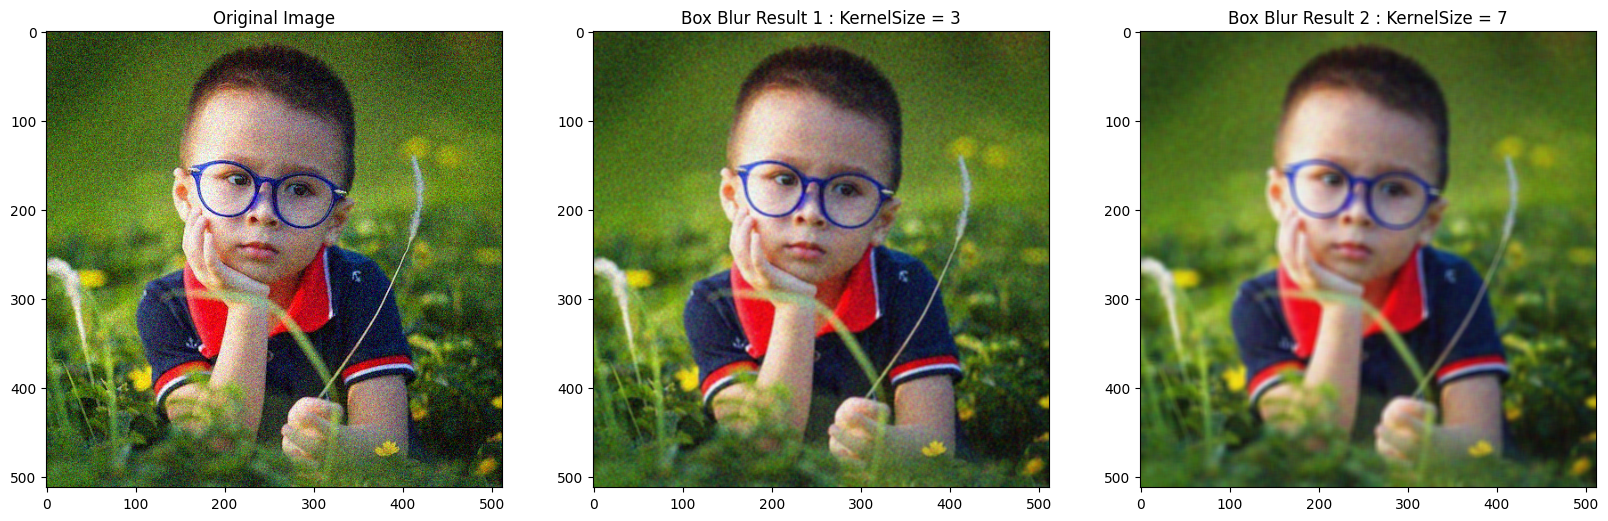

In [3]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Box Blur Result 1 : KernelSize = 3")
plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Box Blur Result 2 : KernelSize = 7")

You can see that the noise can be reduced by increasing the kernel size. But at the same time, the image becomes more and more blurry.